In [1]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-20,176.139999,178.529999,174.639999,178.149994,178.149994,29947200,AMAZON
2024-03-21,179.990005,181.419998,178.149994,178.149994,178.149994,32824300,AMAZON
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMAZON
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMAZON
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMAZON
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32582700,AMAZON


In [2]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [4]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.764207,182.208175,179.425476,180.913399,180.461117,5.724236e+07
std,9.301758,9.176859,9.232809,9.183727,9.244866,1.740515e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,1.480770e+07
25%,173.110004,174.307499,171.874996,173.544998,172.997765,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.343105e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879902,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [35]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-03 to 2024-04-03
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            252 non-null    float64
 1   High            252 non-null    float64
 2   Low             252 non-null    float64
 3   Close           252 non-null    float64
 4   Adj Close       252 non-null    float64
 5   Volume          252 non-null    int64  
 6   company_name    252 non-null    object 
 7   MA for 10 days  243 non-null    float64
 8   MA for 20 days  233 non-null    float64
 9   MA for 50 days  203 non-null    float64
 10  Daily Return    251 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 23.6+ KB


In [36]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,243.000000,233.000000,203.000000,251.000000
mean,131.498449,132.957877,130.346139,131.703115,131.703115,2.318684e+07,131.765650,131.963157,132.671328,0.001716
std,12.320220,12.281944,12.287852,12.311349,12.311349,8.442397e+06,11.271452,10.259204,8.219422,0.017184
min,102.669998,104.949997,102.379997,104.449997,104.449997,5.534119e+06,106.080000,106.398750,114.208500,-0.095989
25%,123.992498,125.398748,122.802502,124.012499,124.012499,1.784935e+07,124.401001,124.173000,125.695900,-0.008200
50%,133.139999,134.404999,132.007500,133.279999,133.279999,2.089110e+07,133.950002,134.979002,134.676000,0.002002
75%,139.639999,140.930000,138.447495,139.690002,139.690002,2.521965e+07,139.316999,138.686500,138.203100,0.010732
max,154.979996,157.000000,154.132095,156.500000,156.500000,5.879610e+07,152.506999,147.988499,145.499399,0.055949


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-03 to 2024-04-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
MSFT.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,351.525277,354.541509,348.519147,351.729723,350.445532,2.511360e+07
std,38.895756,38.841698,38.746214,38.953251,39.618888,9.470683e+06
min,279.510010,281.600006,275.369995,275.420013,273.177948,5.897931e+06
25%,324.929993,328.922508,321.654999,324.955009,323.100121,2.009530e+07
50%,337.389999,341.114990,334.710007,337.964996,336.018234,2.308410e+07
75%,376.765007,379.099998,375.012505,377.542503,376.845627,2.722072e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


In [9]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-03 to 2024-04-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,139.049326,140.621317,137.610754,139.206412,139.206412,5.255109e+07
std,21.148311,21.195282,21.159411,21.256248,21.256248,1.953571e+07
min,98.949997,100.510002,97.709999,97.830002,97.830002,1.002426e+07
25%,126.707499,128.439999,125.105000,126.915001,126.915001,4.189062e+07
50%,135.890007,137.400002,134.334999,135.440002,135.440002,4.852310e+07
75%,152.802502,153.972500,151.625000,153.205002,153.205002,5.881808e+07
max,180.789993,183.000000,179.949997,182.835907,182.835907,1.529387e+08


In [11]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-03 to 2024-04-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


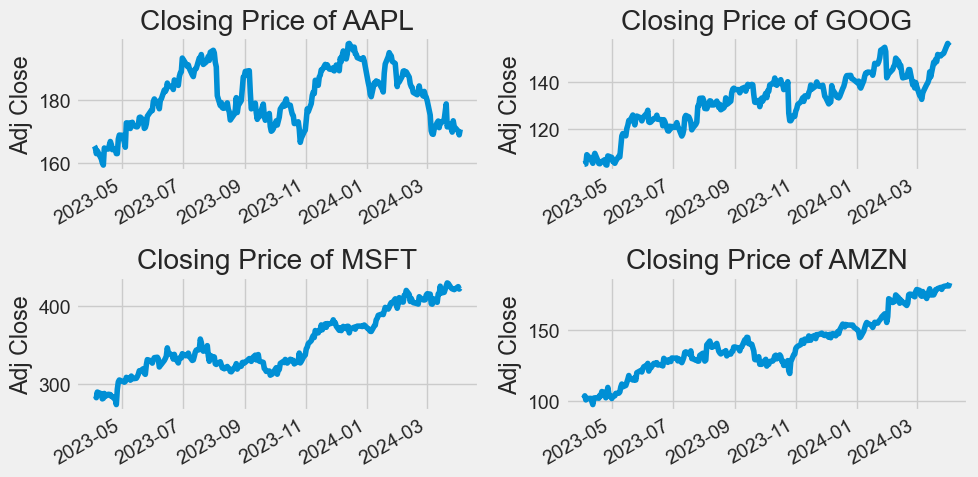

In [38]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

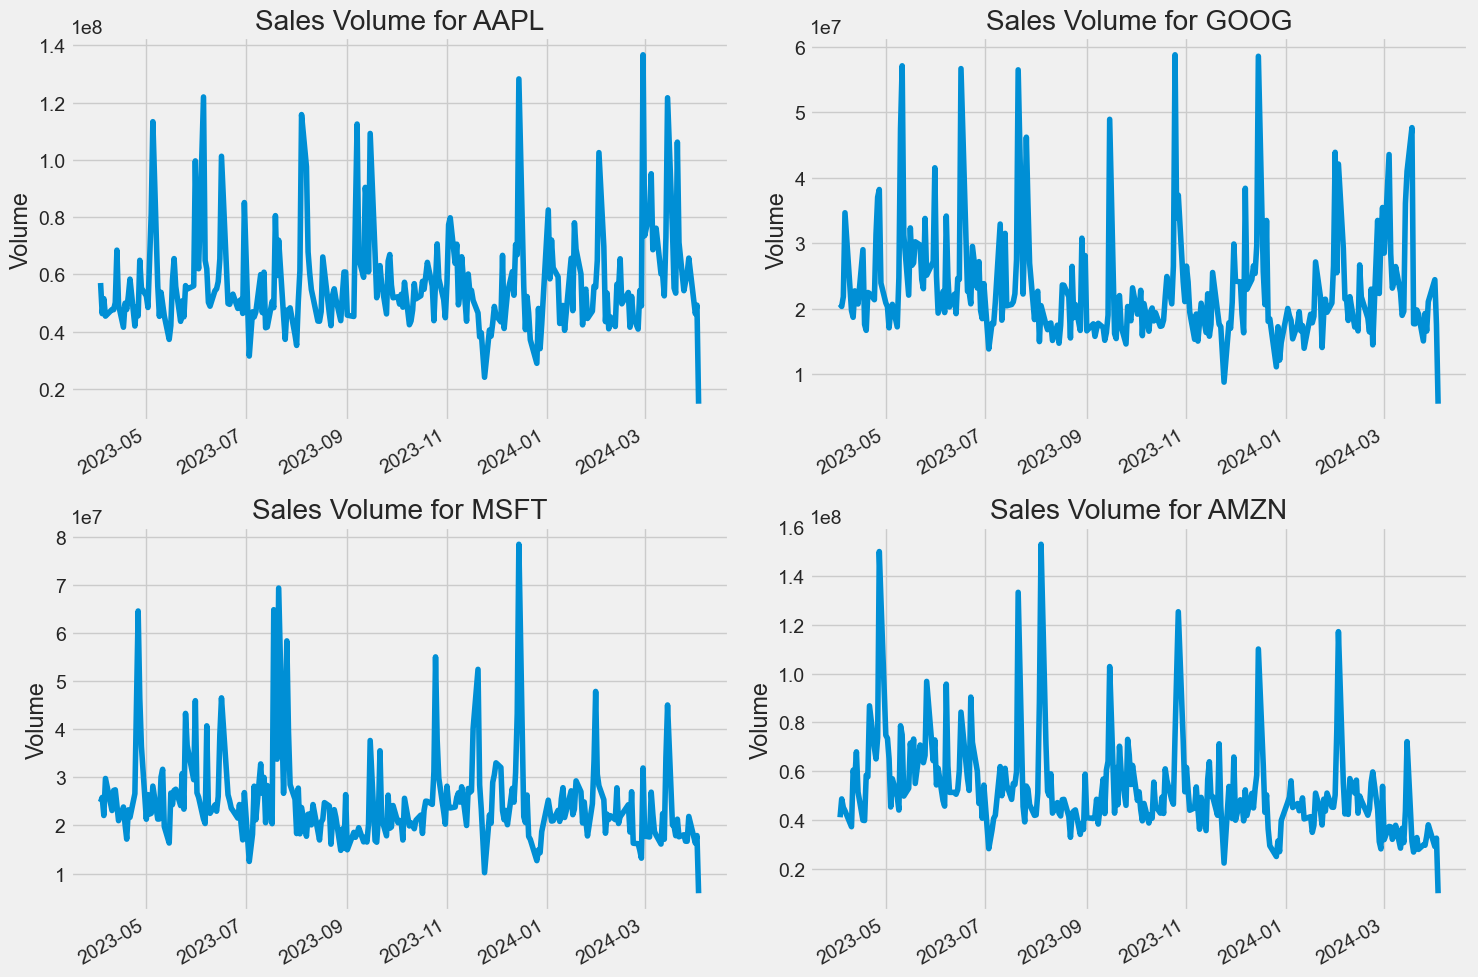

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

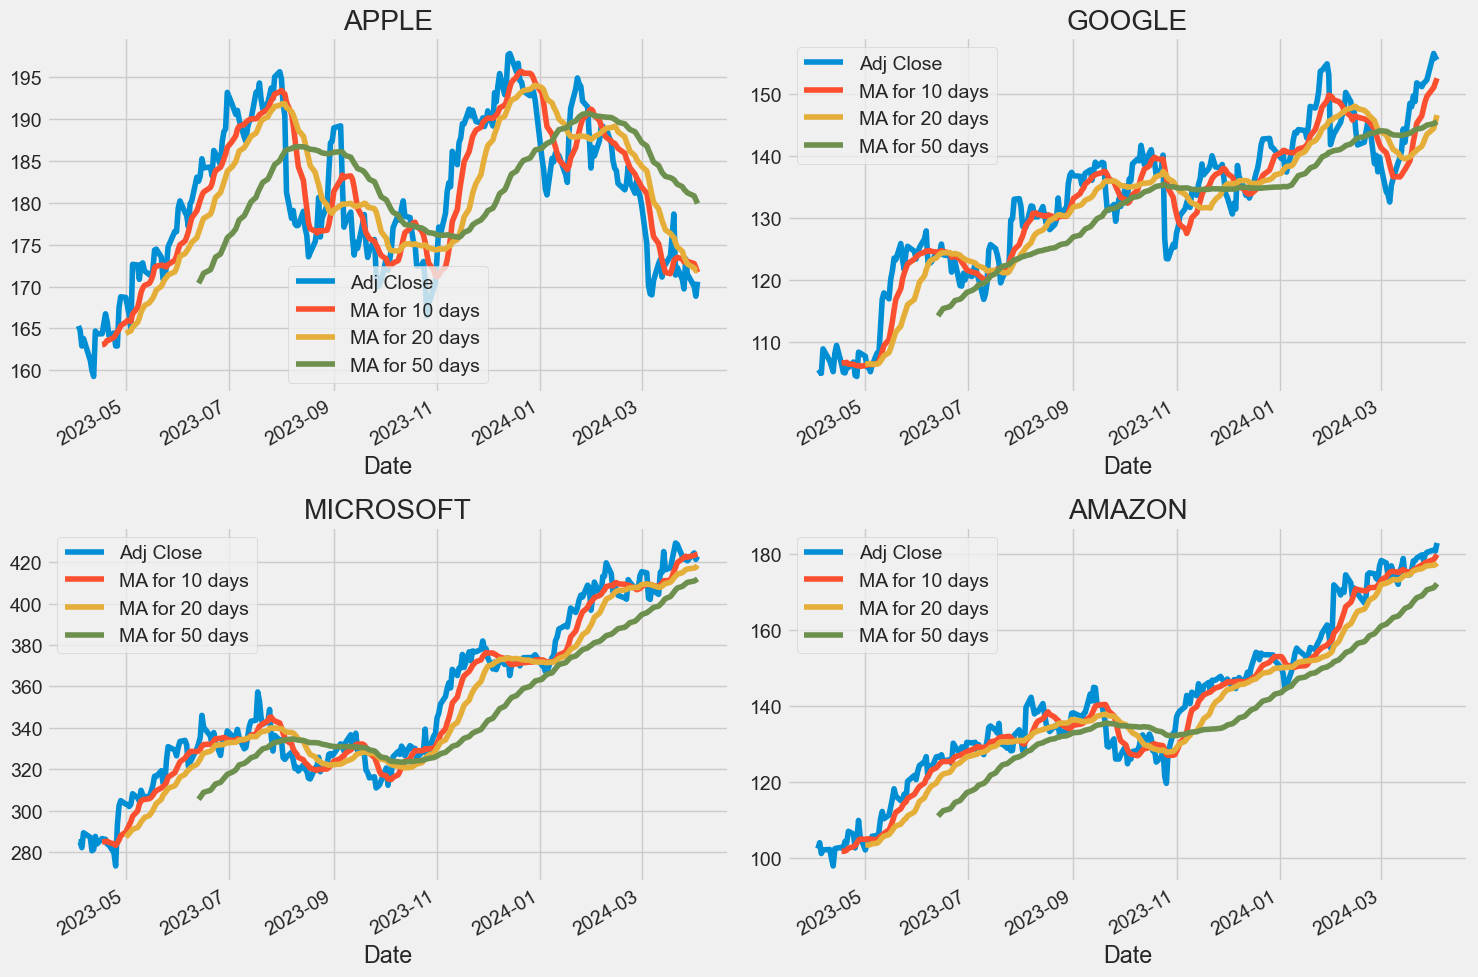

In [41]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

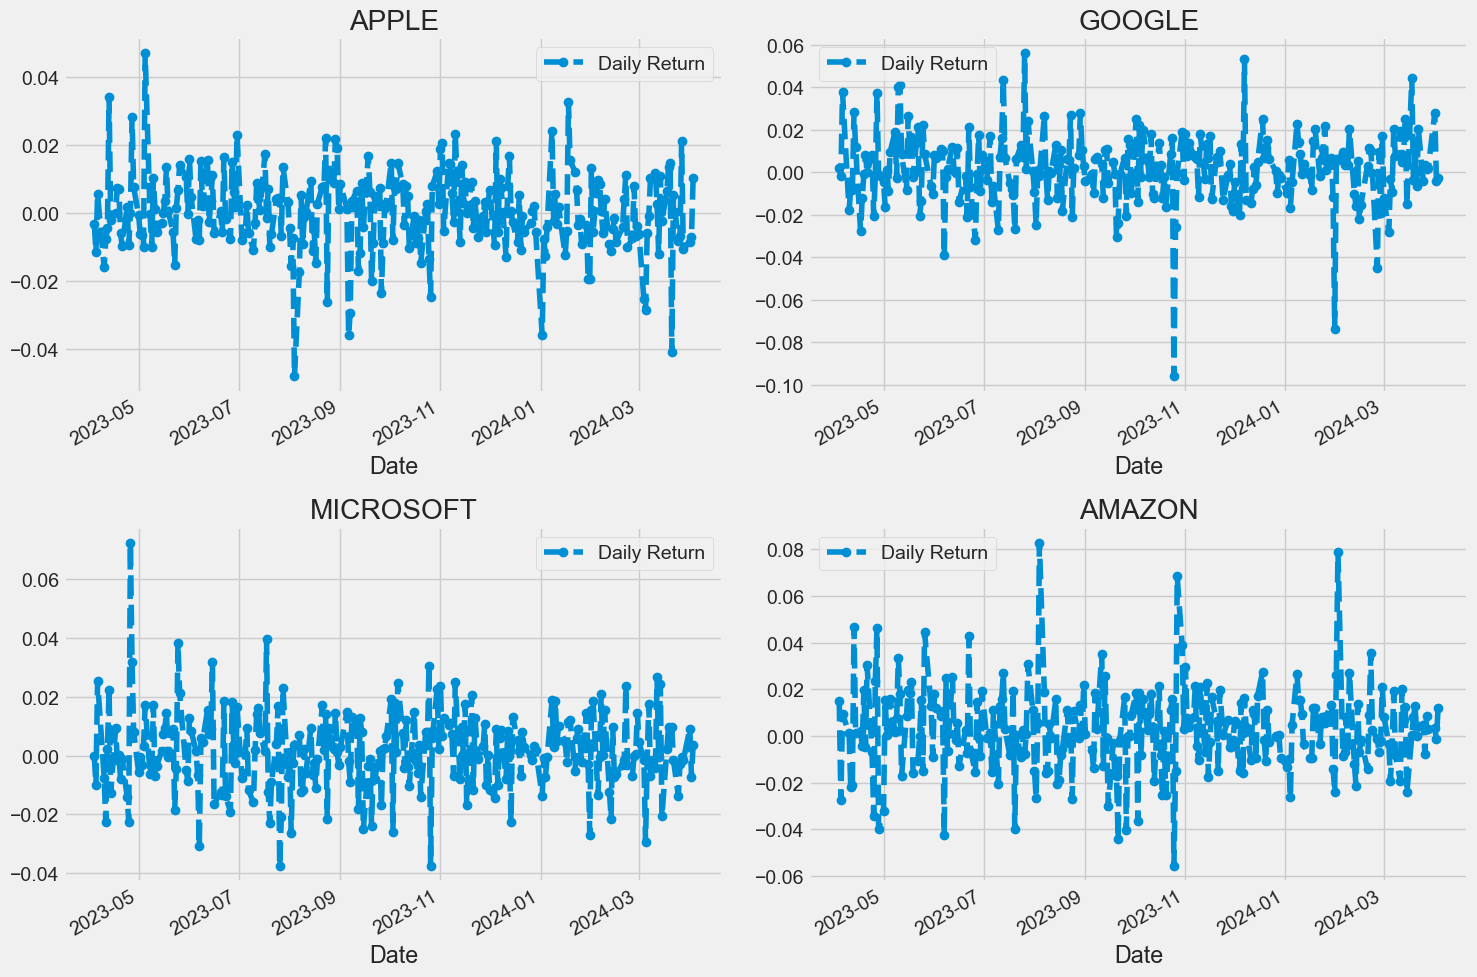

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

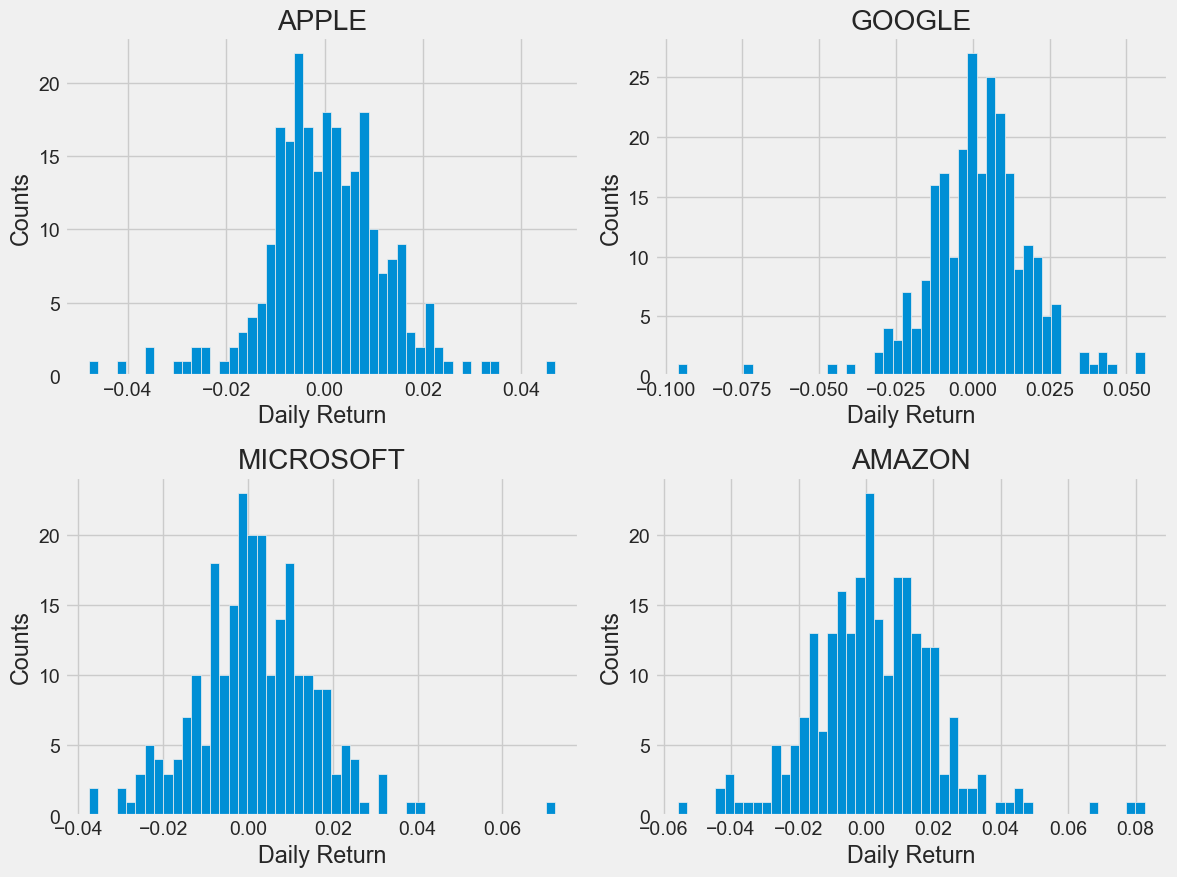

In [17]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [42]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-03,NaN,NaN,NaN,NaN
2023-04-04,-0.003250,0.015038,0.002002,-0.000174
2023-04-05,-0.011290,-0.027417,-0.001617,-0.009889
2023-04-06,0.005496,0.009496,0.037637,0.025533
2023-04-10,-0.015972,0.001078,-0.017906,-0.007579


C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


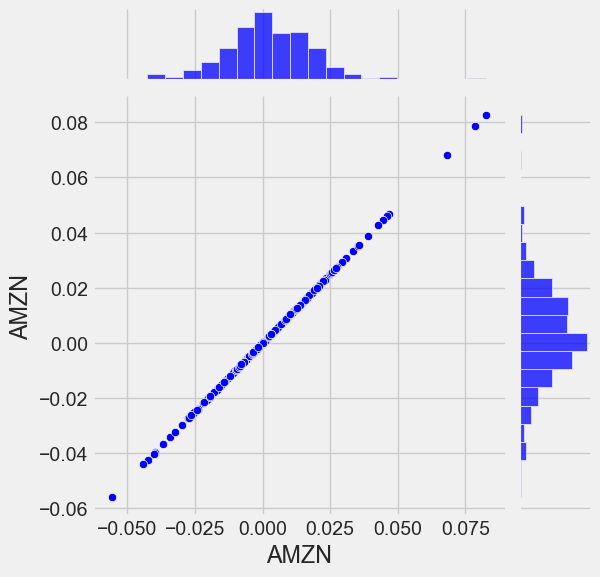

In [22]:
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='blue')

C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


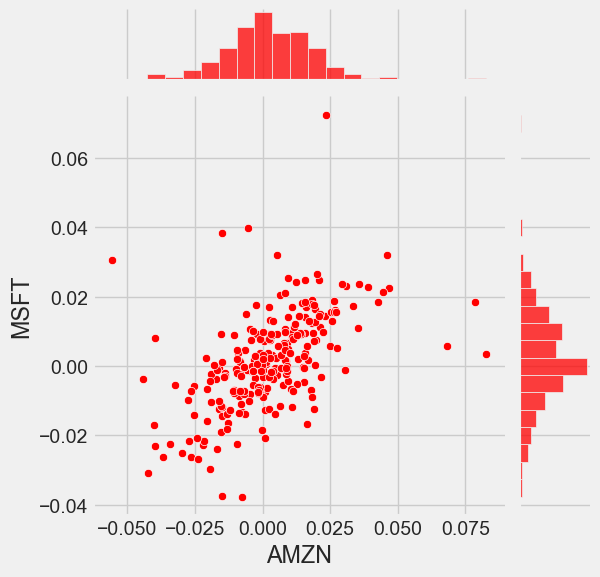

In [24]:
sns.jointplot(x='AMZN', y='MSFT', data=tech_rets, kind='scatter', color='red')

Text(0.5, 1.0, 'Correlation of stock closing price')

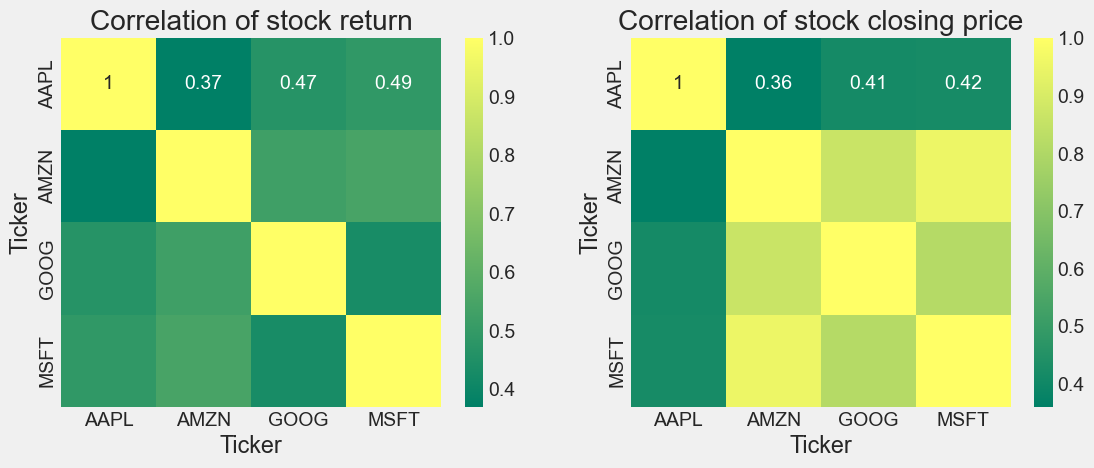

In [43]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

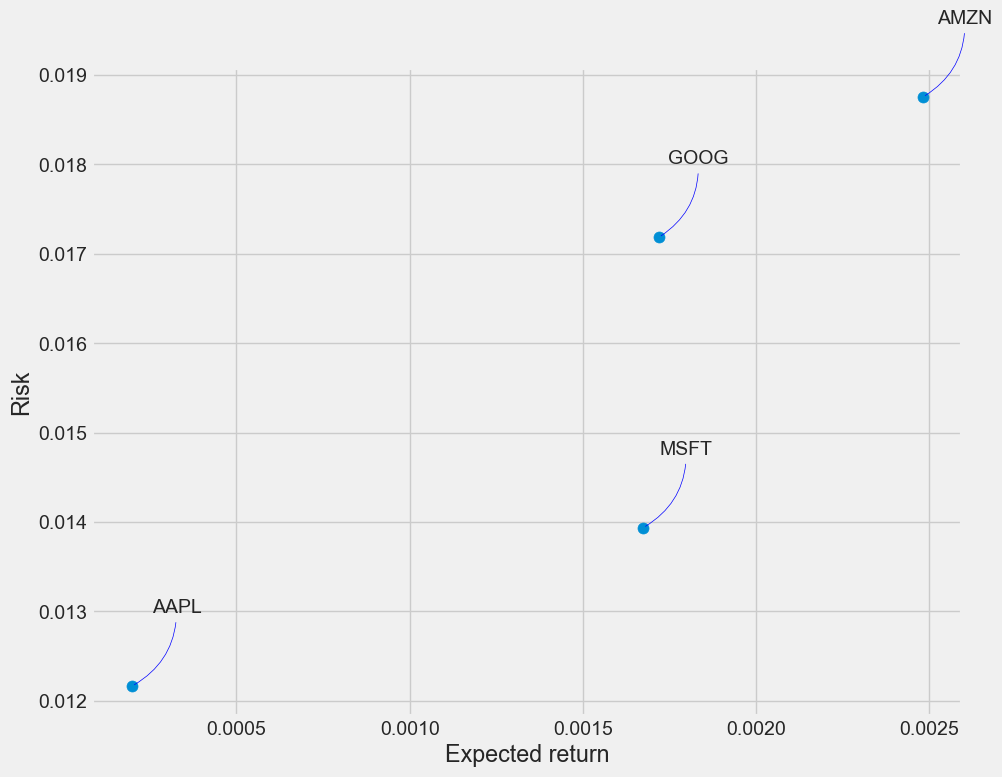

In [45]:
#risk
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [46]:
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500


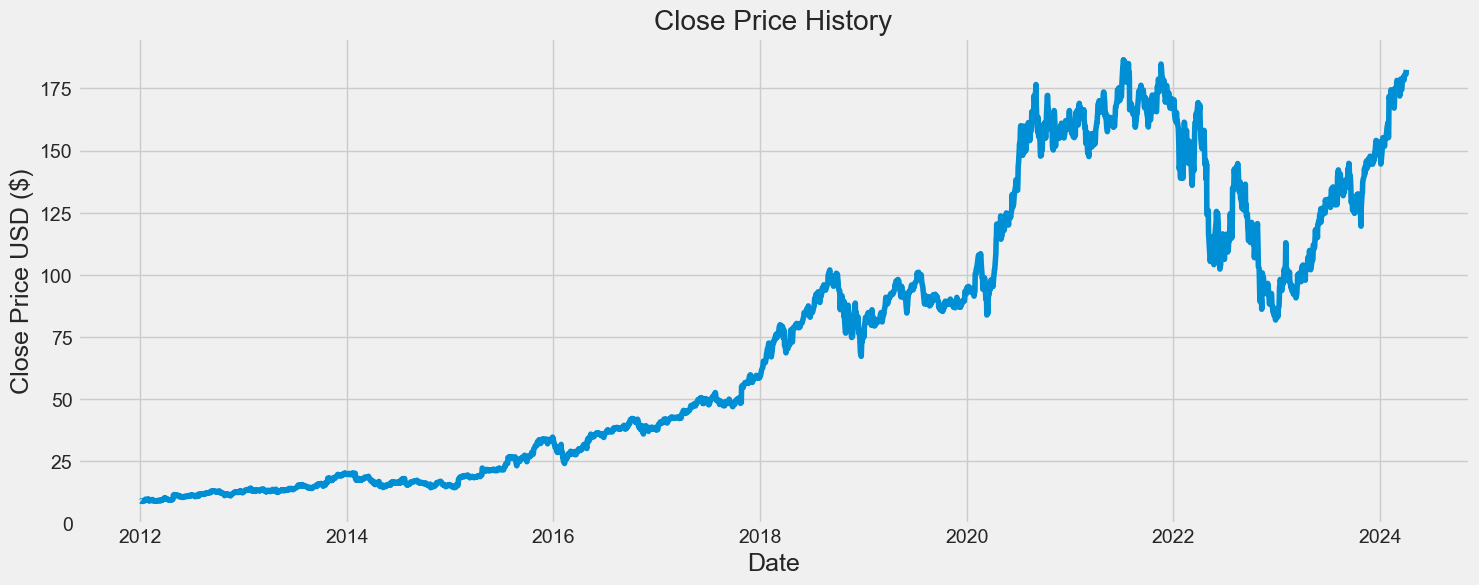

In [28]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [50]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2928

In [51]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [9.68496549e-01],
       [9.66921522e-01],
       [9.77596855e-01]])

In [54]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)




Epoch 1/10

2868/2868 [==============================] - 162s 53ms/step - loss: 0.0019
Epoch 2/10
2868/2868 [==============================] - 149s 52ms/step - loss: 5.2491e-04
Epoch 3/10
2868/2868 [==============================] - 147s 51ms/step - loss: 5.0954e-04
Epoch 4/10
2868/2868 [==============================] - 125s 44ms/step - loss: 3.7914e-04
Epoch 5/10
2868/2868 [==============================] - 75s 26ms/step - loss: 3.4948e-04
Epoch 6/10
2868/2868 [==============================] - 75s 26ms/step - loss: 3.0510e-04
Epoch 7/10
2868/2868 [==============================] - 76s 27ms/step - loss: 3.0769e-04
Epoch 8/10
2868/2868 [==============================] - 77s 27ms/step - loss: 3.0432e-04
Epoch 9/10
2868/2868 [==============================] - 76s 26ms/step - loss: 2.6902e-04
Epoch 10/10
2868/2868 [==============================] - 74s 26ms/step - loss: 2.9200e-04


In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 37ms/step


4.414542900373816

C:\Users\Pranav\AppData\Local\Temp\ipykernel_4116\3690841998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


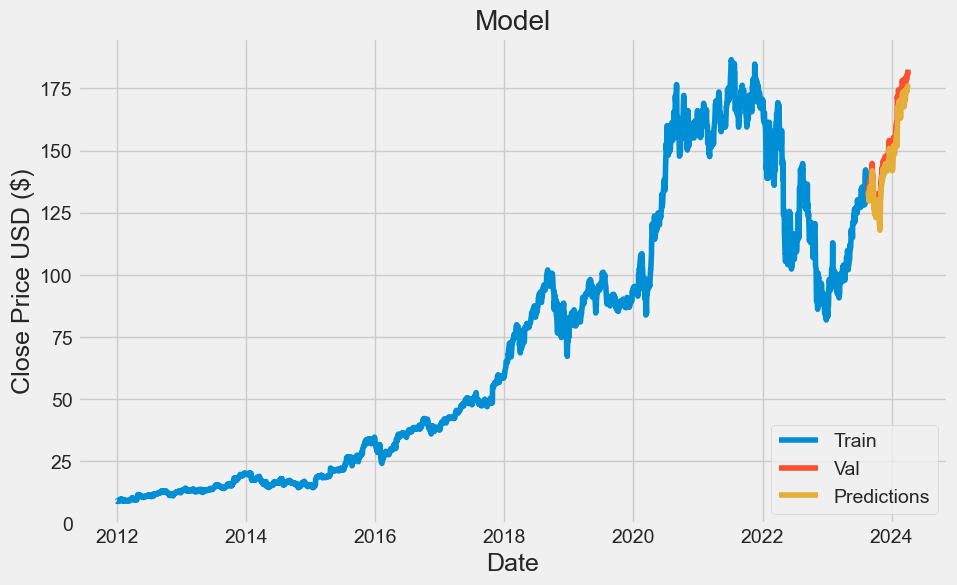

In [60]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid

,Close,Predictions
Date,,
2023-08-23,135.520004,131.971832
2023-08-24,131.839996,133.183548
2023-08-25,133.259995,129.709305
2023-08-28,133.139999,131.029785
2023-08-29,134.910004,130.917694
...,...,...
2024-03-27,179.830002,173.489410
2024-03-28,180.380005,175.006378
2024-04-01,180.970001,175.478058


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.7685637040571733
Mean Squared Error (MSE): 19.488189019240867
Root Mean Squared Error (RMSE): 4.414542900373816
